In [1]:
from os.path import join

In [2]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '..')

Digital Typhoon data comes, at the moment, from two sources:

* **Satellite images**: 512x512 infrared images, with the typhoon eye at the image centre. Each typhoon sequence’s images come as folders with their respective images as H5 files.
* **Best Track data**: Provided by JMA, it contains data characterizing the state of a certain typhoon. There is data since 1951. Each typhoon sequence’s data comes in a TSV file.

To this end, pyphoon provides a set of tools to integrate the different sources and ease the interaction with those. 

## 1. Reading images
Let us illustrate this by considering the sequence `201725`. We start by considering its images, which are assumed to be stored under the folder `../original_data/image/201725` as individual H5 files.

In [23]:
import multiprocessing
pool = multiprocessing.Pool()
pool._processes

16

In [19]:
from pyphoon.io.h5 import read_source_images
from pyphoon.io.utils import get_image_ids
images = read_source_images("../original_data/image/201725/")
images_ids = get_image_ids("../original_data/image/201725/")

In [17]:
from pyphoon.io.tsv import read_tsv
from pyphoon.io.utils import get_best_ids
best = read_tsv("../original_data/jma/201725.tsv")
best_ids = get_best_ids(images, seq_name="201725")

To verify that the sequence has correctly loaded the images, we can plot some frame. We will check frame with index 10.

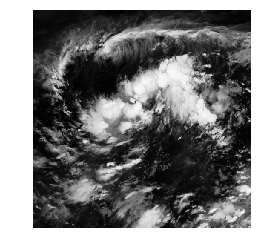

In [8]:
plt.axis('off')
plt.imshow(images[10], cmap="Greys")
plt.show()

## 2. Visualize the sequence

Finally, let us visualize the sequence image frames. This is done by using a `DisplaySequence` object. To use this on a Notebook, we employ `HTML` from `IPython.display`.

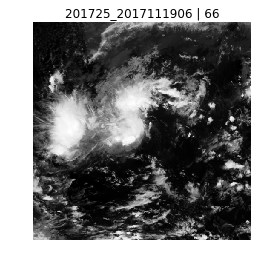

In [9]:
# TODO: No idea why there are two plots
from pyphoon.visualize import DisplaySequence
from IPython.display import HTML

HTML(DisplaySequence(
    images=images,
    images_ids=images_ids,
    name="test",
    interval=100
).run_html())